# Task 1 Statevector simulation of quantum circuits

**Advanced simulation using tensor multiplication**

Number of qubits: 0, Runtime: 0.0006 seconds
Number of qubits: 1, Runtime: 0.0007 seconds
Number of qubits: 2, Runtime: 0.0007 seconds
Number of qubits: 3, Runtime: 0.0205 seconds
Number of qubits: 4, Runtime: 2.2643 seconds


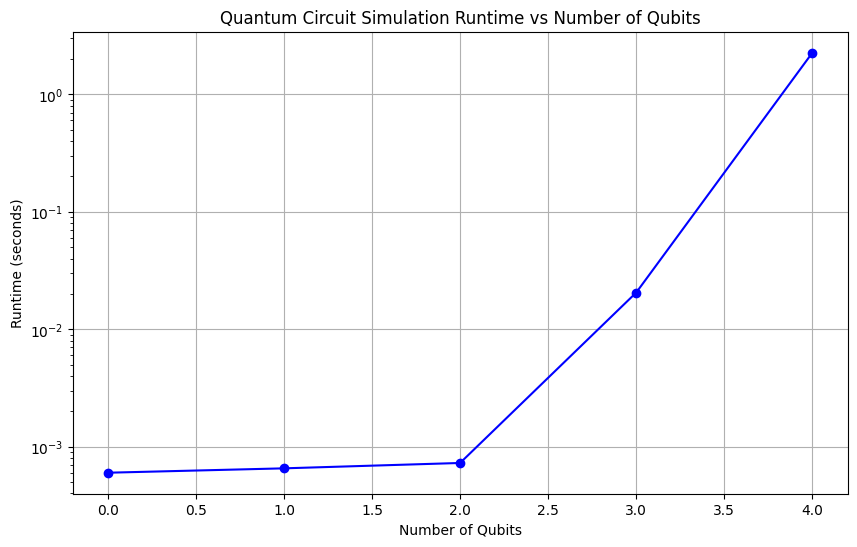

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Define basic quantum gates
I = np.array([[1, 0], [0, 1]])  # Identity gate
X = np.array([[0, 1], [1, 0]])  # NOT gate (Pauli-X)
H = 1/np.sqrt(2) * np.array([[1, 1], [1, -1]])  # Hadamard gate

CNOT = np.array([[1, 0, 0, 0],                  # CNOT gate
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])

def initialize_state(n_qubits):
    """Initialize the state tensor"""
    state = np.zeros((2,) * n_qubits)
    state[(0,) * n_qubits] = 1                  # Initialize the quantum tensor state
    return state

def apply_single_qubit_gate(gate, target_qubit, n_qubits):
    """Apply a single qubit gate to a specific qubit"""
    result = np.array([[1]])

    for i in range(n_qubits):
        if i == target_qubit:
            result = np.kron(result, gate)
        else:
            result = np.kron(result, I)

    return result

def apply_cnot(control, target, n_qubits):
    """Apply CNOT gate between control and target qubits"""
    if abs(control - target) != 1:
        raise ValueError("CNOT can only be applied to adjacent qubits in this implementation")

    result = np.array([[1]])

    for i in range(min(control, target)):
        result = np.kron(result, I)

    result = np.kron(result, CNOT)

    for i in range(min(control, target) + 2, n_qubits):
        result = np.kron(result, I)

    return result

def simulate_circuit(n_qubits):
    """Simulate a quantum circuit with X, H, and CNOT gates"""
    # Initialize state
    state = initialize_state(n_qubits)

    # Apply X gate to first qubit
    x_matrix = apply_single_qubit_gate(X, 0, n_qubits)
    state = np.tensordot(x_matrix, state, axes=0)

    # Apply H gate to second qubit
    h_matrix = apply_single_qubit_gate(H, 1, n_qubits)
    state = np.tensordot(h_matrix, state, axes=0)

    # Apply CNOT between first two qubits
    if n_qubits >= 2:
        cnot_matrix = apply_cnot(0, 1, n_qubits)
        state = np.tensordot(cnot_matrix, state, axes=0)

    return state

def measure_runtime():
    """Measure runtime for different numbers of qubits"""
    n_qubits_range = range(0,5)       # Only till qubit no 4, I was able to simulate
    runtimes = []

    for n in n_qubits_range:
        start_time = time.time()
        simulate_circuit(n)
        end_time = time.time()
        runtimes.append(end_time - start_time)
        print(f"Number of qubits: {n}, Runtime: {runtimes[-1]:.4f} seconds")

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(list(n_qubits_range), runtimes, 'bo-')
    plt.xlabel('Number of Qubits')
    plt.ylabel('Runtime (seconds)')
    plt.title('Quantum Circuit Simulation Runtime vs Number of Qubits')
    plt.grid(True)
    plt.yscale('log')
    plt.show()


measure_runtime()